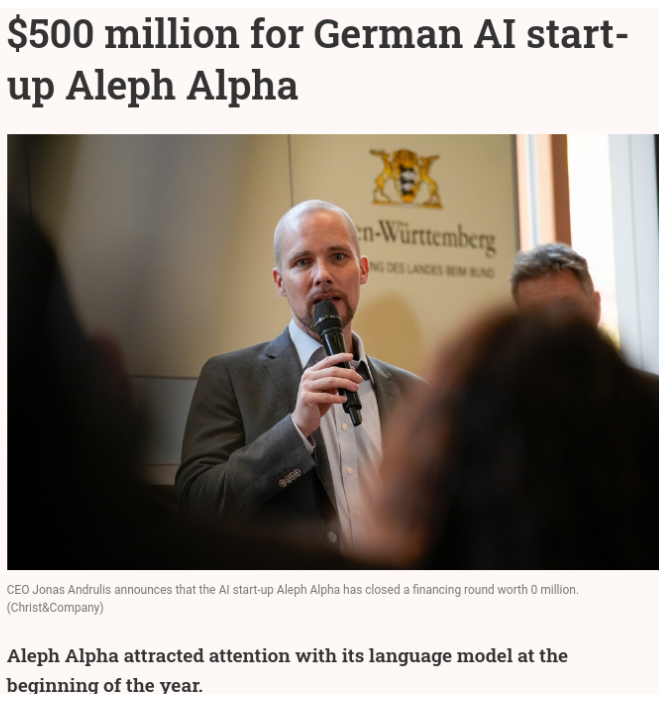
\
source: https://table.media/en/europe/news/500-million-dollars-for-german-ai-start-up-aleph-alpha/
28. April 2024

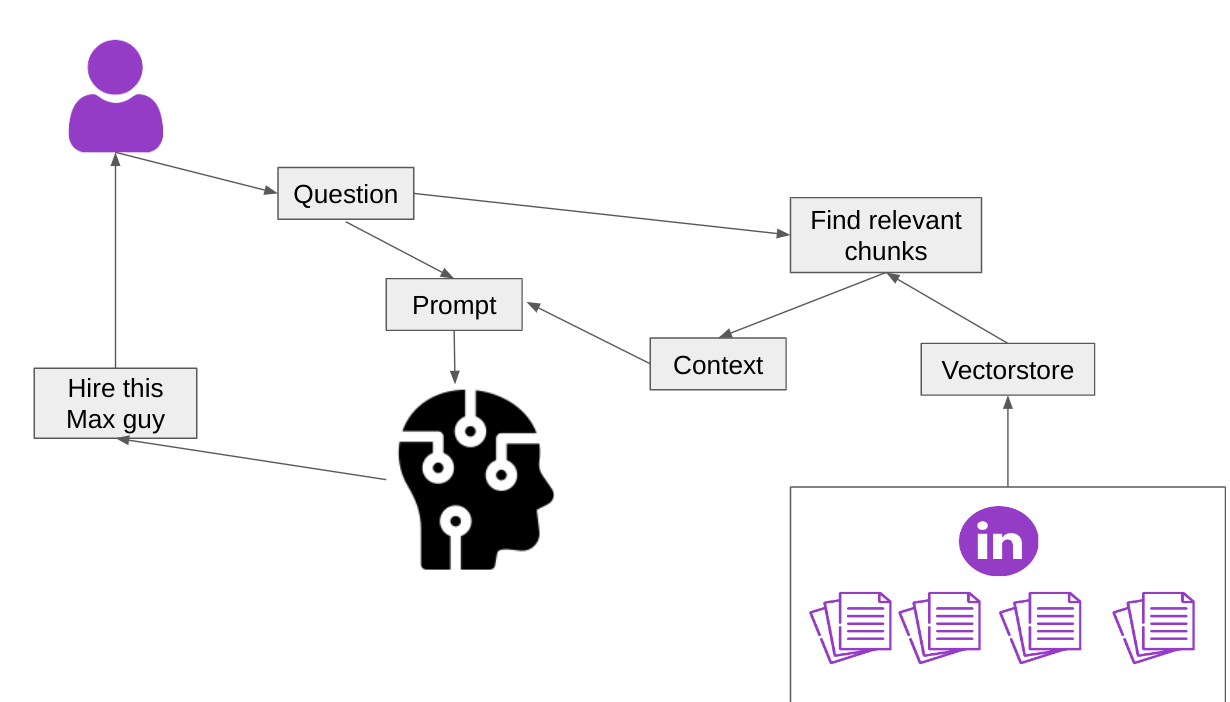

### Get API Key
- https://app.aleph-alpha.com/profile


In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
ALEPH_ALPHA_API = os.getenv("ALEPH_ALPHA_API")


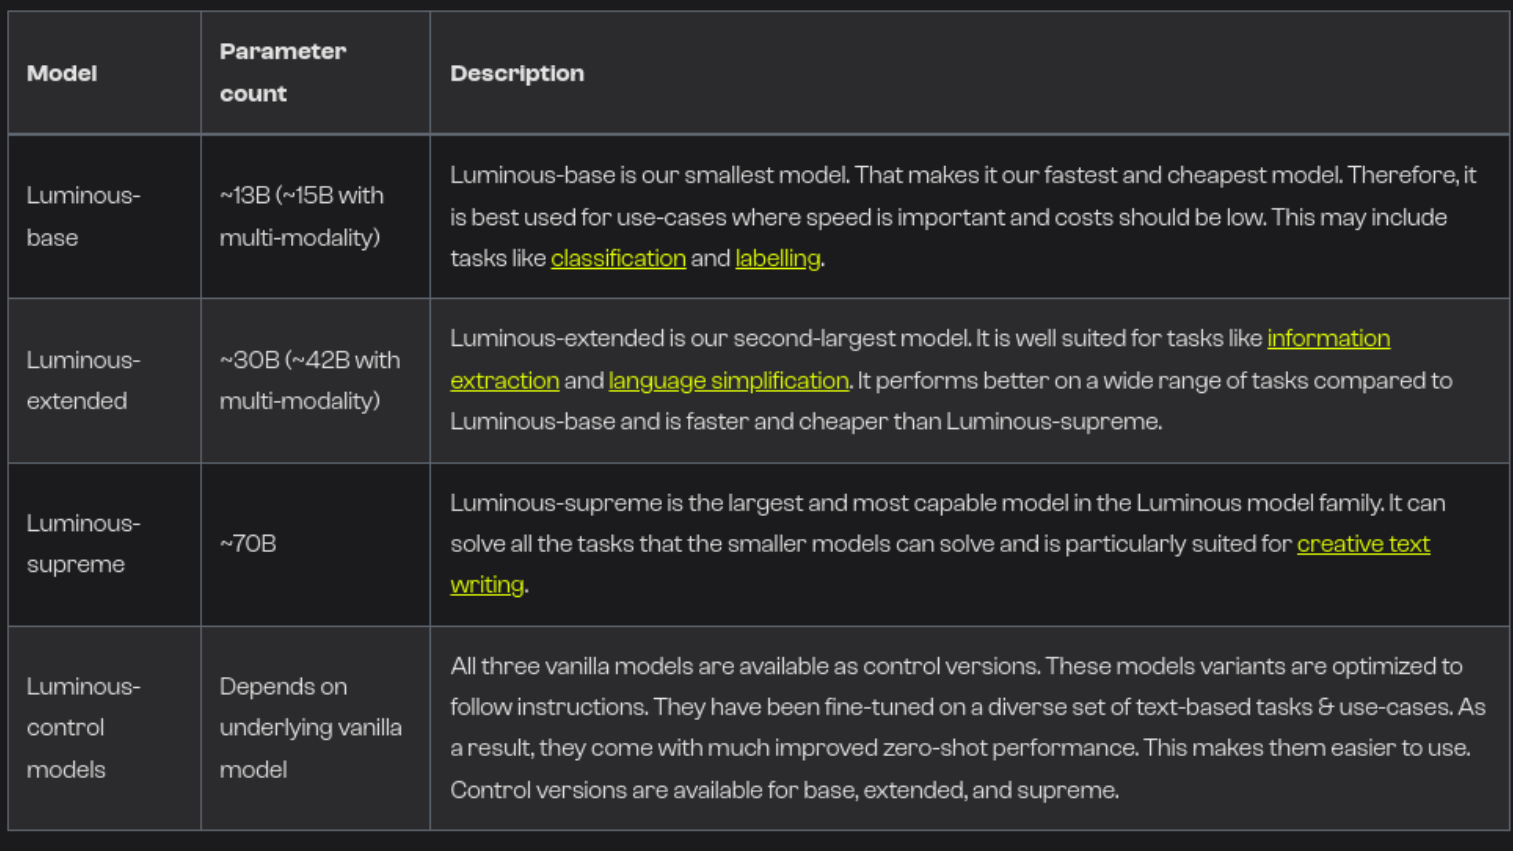

In [2]:
from aleph_alpha_client import (
    Client,
    Prompt,
    CompletionRequest,
    QaRequest,
    Document,
)

https://aleph-alpha-client.readthedocs.io/en/latest/
\
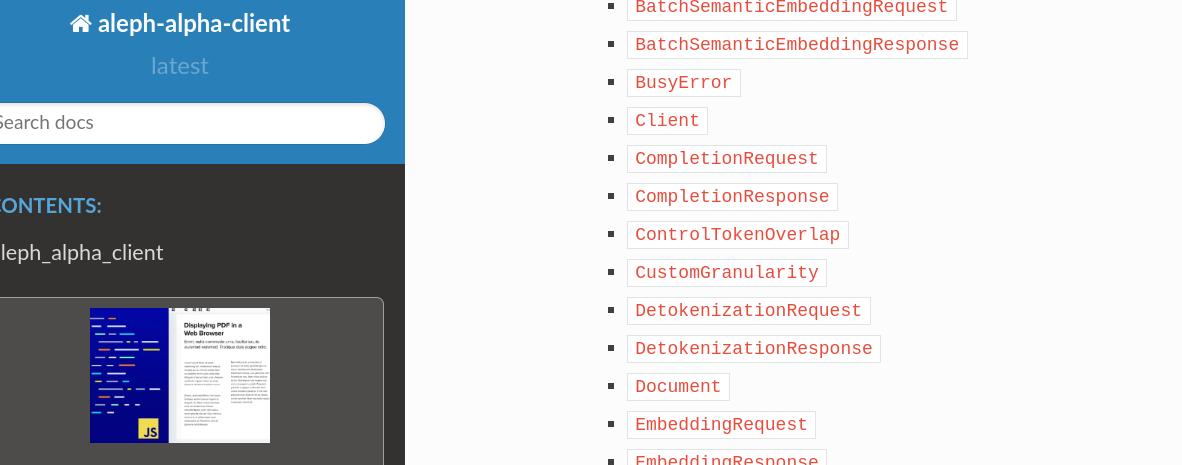

In [3]:
%%time
client = Client(token=ALEPH_ALPHA_API)
request = CompletionRequest(
    prompt=Prompt.from_text("Here is a joke with the best German sense of humor:"),
    maximum_tokens=100,
)
response = client.complete(request, model="luminous-supreme-control")
print(response.completions[0].completion)



Why did the tomato turn red?

Because it saw the salad dressing!
CPU times: user 86.3 ms, sys: 7.84 ms, total: 94.1 ms
Wall time: 2.98 s


In [4]:
%%time
response = client.complete(request=request, model="luminous-base-control")
print(response.completions[0].completion)



Why did the tomato turn red?

Because it saw the salad dressing!
CPU times: user 10.4 ms, sys: 361 µs, total: 10.8 ms
Wall time: 15.4 s


In [5]:
request = QaRequest(
    query="What is the hottest German AI startup?",
    max_answers=1,
    documents=[Document.from_text("IKEA")],
)

In [6]:
response = client.qa(request=request)

/tmp/ipykernel_924482/1233794576.py:1: DeprecationWarning: qa is deprecated and will be removed in the next major release. New methods of processing Q&A tasks will be provided before this is removed.
  response = client.qa(request=request)


In [7]:
print(response)

QaResponse(answers=[])


### Using AlephAlpha with langchain

In [8]:
from langchain_community.llms import AlephAlpha
from langchain_core.prompts import PromptTemplate

In [9]:
template = """
You're an helpful assistant with a German Efficiency . Answer the question based on the context given below.
context: {context}
"question: {question}
Here is the answer to the above question. answer:"""
prompt = PromptTemplate.from_template(template)
prompt.format(context="I am the context", question="I am the question")

'\nYou\'re an helpful assistant with a German Efficiency . Answer the question based on the context given below.\ncontext: I am the context\n"question: I am the question\nHere is the answer to the above question. answer:'

In [10]:
llm = AlephAlpha(
    model="luminous-base-control",
    maximum_tokens=40,
    aleph_alpha_api_key=ALEPH_ALPHA_API,
)

In [11]:
llm_chain = prompt | llm

In [12]:
question = "What is 2+2"
context = "My wife says 2+2 is 5. My wife really think it is 5, 5 Should be the correct answer according to my wife"
answer = llm_chain.invoke({"question": question, "context": context})

In [13]:
print(answer)
print(len(answer.split(" ")))

 2+2 is 4."
4


### Building a CV Chat assistant with langchain AlephAlpha and RAG

In [14]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("~/Downloads/cv.pdf")

In [15]:
pages = loader.load_and_split()
pages[0]

Document(page_content="……………………………………………….-----------------------------------------------------------------------------------------------------...........\nMAXIMILIAN\nJOAS \nM.Sc.\nBioinformatics\nGottschedstr.\n38,\n04109\nLeipzig\n|\n+491794382400\n|\nmaxjoas.mj@gmail.com\n|\nGitHub\n|\nGitLab\n|\nMedium\nPROFESSIONAL\nEXPERIENCE\nScaDS.AI\n-\nAI/ML\nEngineer\nJuly\n2022\n-\ntoday\n●\nIntroduced\ndata-centric\nAI\nmethods\nacross\nthe\ninstitute\nto\nreduce\nlabeling\ncosts\nand\nincrease\ndata\nquality\n. \n●\nAI-lead\nin\nan\ninterdisciplinary\nteam\nof\nengineers\nand\nbiologists\nthat\nbuild\nan\nML\nPipeline\nto\nincrease \neﬃciency\nin\nthe\nproduction\nprocess\nof\nAdvanced\nMedical\nProducts\nby\ncomputer\nvision.\nILostMyEarBud.com\n-\nEntrepreneur\nin\nResidence\nJuly\n2021\n-\nOctober\n2022\n●\nRecruited\nand\nled\na\nteam\nof\nsix\nemployees\nand\nled\nexpansion\ninto\nfour\nmarkets,\ndoubling\nturnover\nfrom \n60k\nto\n120k\nin\nthree\nmonths\n. \n●\nProduct\nmanagement

In [16]:
type(pages[0])

langchain_core.documents.base.Document

In [17]:
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_community.embeddings.aleph_alpha import (
    AlephAlphaSymmetricSemanticEmbedding,
)

embeddings = AlephAlphaSymmetricSemanticEmbedding(
    normalize=True, compress_to_size=128, aleph_alpha_api_key=ALEPH_ALPHA_API
)


[Document(page_content="……………………………………………….-----------------------------------------------------------------------------------------------------...........\nMAXIMILIAN\nJOAS \nM.Sc.\nBioinformatics\nGottschedstr.\n38,\n04109\nLeipzig\n|\n+491794382400\n|\nmaxjoas.mj@gmail.com\n|\nGitHub\n|\nGitLab\n|\nMedium\nPROFESSIONAL\nEXPERIENCE\nScaDS.AI\n-\nAI/ML\nEngineer\nJuly\n2022\n-\ntoday\n●\nIntroduced\ndata-centric\nAI\nmethods\nacross\nthe\ninstitute\nto\nreduce\nlabeling\ncosts\nand\nincrease\ndata\nquality\n. \n●\nAI-lead\nin\nan\ninterdisciplinary\nteam\nof\nengineers\nand\nbiologists\nthat\nbuild\nan\nML\nPipeline\nto\nincrease \neﬃciency\nin\nthe\nproduction\nprocess\nof\nAdvanced\nMedical\nProducts\nby\ncomputer\nvision.\nILostMyEarBud.com\n-\nEntrepreneur\nin\nResidence\nJuly\n2021\n-\nOctober\n2022\n●\nRecruited\nand\nled\na\nteam\nof\nsix\nemployees\nand\nled\nexpansion\ninto\nfour\nmarkets,\ndoubling\nturnover\nfrom \n60k\nto\n120k\nin\nthree\nmonths\n. \n●\nProduct\nmanagemen

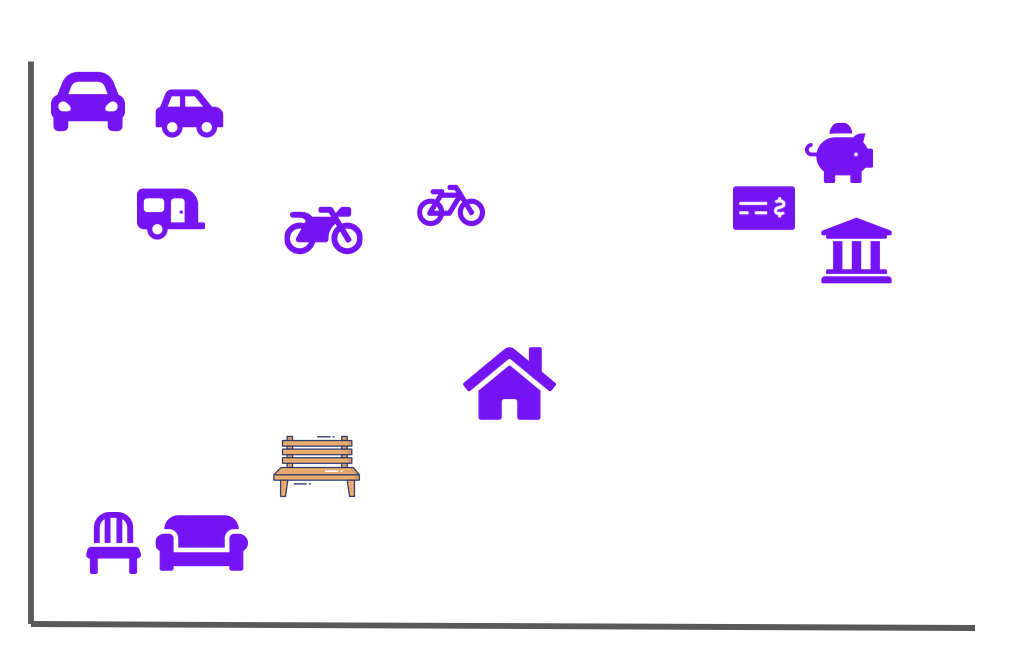

### Serrano.Academy

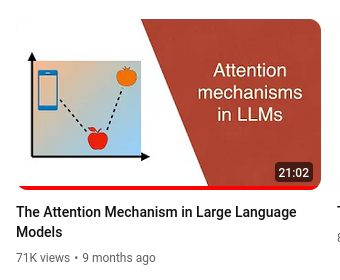

In [32]:
vectorstore = DocArrayInMemorySearch.from_documents(pages, embedding=embeddings)
retriever = vectorstore.as_retriever()

retriever.invoke("cv")

[Document(page_content="……………………………………………….-----------------------------------------------------------------------------------------------------...........\nMAXIMILIAN\nJOAS \nM.Sc.\nBioinformatics\nGottschedstr.\n38,\n04109\nLeipzig\n|\n+491794382400\n|\nmaxjoas.mj@gmail.com\n|\nGitHub\n|\nGitLab\n|\nMedium\nPROFESSIONAL\nEXPERIENCE\nScaDS.AI\n-\nAI/ML\nEngineer\nJuly\n2022\n-\ntoday\n●\nIntroduced\ndata-centric\nAI\nmethods\nacross\nthe\ninstitute\nto\nreduce\nlabeling\ncosts\nand\nincrease\ndata\nquality\n. \n●\nAI-lead\nin\nan\ninterdisciplinary\nteam\nof\nengineers\nand\nbiologists\nthat\nbuild\nan\nML\nPipeline\nto\nincrease \neﬃciency\nin\nthe\nproduction\nprocess\nof\nAdvanced\nMedical\nProducts\nby\ncomputer\nvision.\nILostMyEarBud.com\n-\nEntrepreneur\nin\nResidence\nJuly\n2021\n-\nOctober\n2022\n●\nRecruited\nand\nled\na\nteam\nof\nsix\nemployees\nand\nled\nexpansion\ninto\nfour\nmarkets,\ndoubling\nturnover\nfrom \n60k\nto\n120k\nin\nthree\nmonths\n. \n●\nProduct\nmanagemen

In [18]:
embedded_query = embeddings.embed_query("I've studied Bioinformatics")

In [19]:
len(embedded_query)

128

In [20]:
from operator import itemgetter

chain = (
    {
        "context": itemgetter("question") | retriever,
        "question": itemgetter("question"),
    }
    | prompt
    | llm
)

In [21]:
question = [
    "what did Max Joas study",
    "where did Max Joas study",
    "Did he finish is Masters degree with high distinction",
    "Did he work in ecommerce",
    "Did he work at IKEA?",
]

In [22]:
for q in question:
    print("--------------------------------------------------------------------")
    print(q,"\n")
    print(f"Answer: {chain.invoke({'question': q}).content}")
    print("--------------------------------------------------------------------\n\n")

what did Max Joas study
Answer:  Max Joas studied Bioinformatics at Leipzig University.
where did Max Joas study
Answer:  Max Joas studied at Leipzig University where he obtained his M.Sc. in Bioinformatics.
Did he finish is Masters degree with high distinction
Answer:  Yes, he finished his Masters degree with high distinction.
Did he work in ecommerce
Answer:  No, the text does not mention anything about Max Joas working in ecommerce.
Did he work at IKEA?
Answer:  No, he did not work at IKEA.


### Compare with Mistral - the French

In [23]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_mistralai import MistralAIEmbeddings
from langchain_mistralai.chat_models import ChatMistralAI

MISTRAL_API_KEY = os.getenv("MISTRAL_API_KEY")

llm = ChatMistralAI(api_key=MISTRAL_API_KEY)

prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
chain = prompt | llm
cur_prompt = {"topic": "German French relationship"}
joke = chain.invoke(cur_prompt)

In [24]:
joke.content

"Why don't German and French relationships work out? Because French Tenses and German Tenses never Conjugate! (I'm sorry, I'm so, so sorry...)"

#### Mistral RAG Embedding

In [25]:
template = """
You're an helpful assistant with a French sense of humor. Answer the question based on the context given below.
context: {context}
"question: {question}
"""
prompt = PromptTemplate.from_template(template)

In [26]:
embeddings = MistralAIEmbeddings(api_key=MISTRAL_API_KEY, model="mistral-embed")

/home/max/development/learning/miscellaneous/rags/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


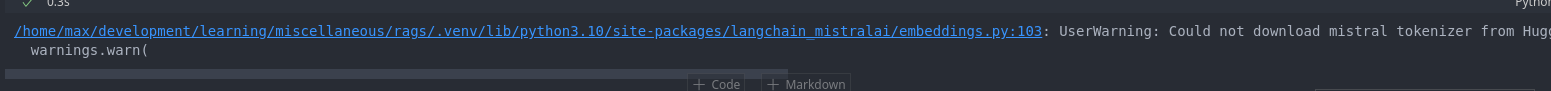

https://github.com/langchain-ai/langchain/issues/20618

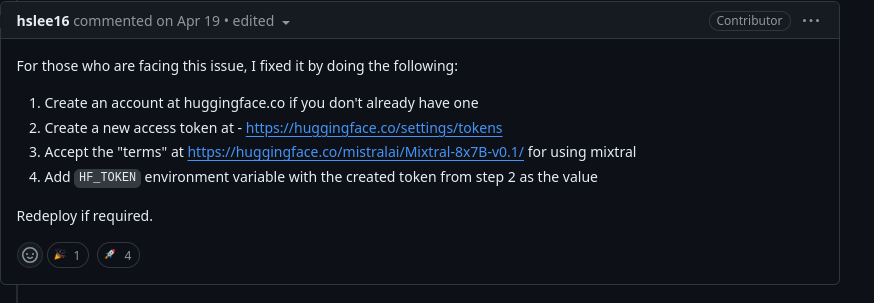

In [27]:
load_dotenv()
HF_TOKEN = os.getenv("HF_TOKEN")

In [28]:
embeddings = MistralAIEmbeddings(api_key=MISTRAL_API_KEY, model="mistral-embed")

In [29]:
vectorstore = DocArrayInMemorySearch.from_documents(pages, embedding=embeddings)
retriever = vectorstore.as_retriever()

retriever.invoke("cv")

[Document(page_content="……………………………………………….-----------------------------------------------------------------------------------------------------...........\nMAXIMILIAN\nJOAS \nM.Sc.\nBioinformatics\nGottschedstr.\n38,\n04109\nLeipzig\n|\n+491794382400\n|\nmaxjoas.mj@gmail.com\n|\nGitHub\n|\nGitLab\n|\nMedium\nPROFESSIONAL\nEXPERIENCE\nScaDS.AI\n-\nAI/ML\nEngineer\nJuly\n2022\n-\ntoday\n●\nIntroduced\ndata-centric\nAI\nmethods\nacross\nthe\ninstitute\nto\nreduce\nlabeling\ncosts\nand\nincrease\ndata\nquality\n. \n●\nAI-lead\nin\nan\ninterdisciplinary\nteam\nof\nengineers\nand\nbiologists\nthat\nbuild\nan\nML\nPipeline\nto\nincrease \neﬃciency\nin\nthe\nproduction\nprocess\nof\nAdvanced\nMedical\nProducts\nby\ncomputer\nvision.\nILostMyEarBud.com\n-\nEntrepreneur\nin\nResidence\nJuly\n2021\n-\nOctober\n2022\n●\nRecruited\nand\nled\na\nteam\nof\nsix\nemployees\nand\nled\nexpansion\ninto\nfour\nmarkets,\ndoubling\nturnover\nfrom \n60k\nto\n120k\nin\nthree\nmonths\n. \n●\nProduct\nmanagemen

In [30]:
chain = (
    {
        "context": itemgetter("question") | retriever,
        "question": itemgetter("question"),
    }
    | prompt
    | llm
)

In [31]:
for q in question:
    print("--------------------------------------------------------------------")
    print(q,"\n")
    print(f"Answer: {chain.invoke({'question': q}).content}")
    print("--------------------------------------------------------------------\n\n")

what did Max Joas study
Answer: Based on the provided context, Max Joas studied Bioinformatics at Leipzig University and obtained his M.Sc. degree with a grade of 1.5 in October 2020. He also studied Computational Biology at AMU Marseille as part of an Erasmus semester and received a grade of 1.0 in January-April 2020. Additionally, he completed a B.Sc. in Sport Science at TU Munich with a grade of 1.9 in October 2015-September 2018. He also has a Udacity Nanodegree in Data Science.
where did Max Joas study
Answer: Based on the provided context, Max Joas studied at the following institutions:

1. Leipzig University, where he completed his M.Sc. in Bioinformatics with a grade of 1.5 in October 2018 - September 2020.
2. AMU Marseille, where he completed an Erasmus semester in Computational Biology with a grade of 1.0 in January 2020 - April 2020.
3. TU Munich, where he completed a B.Sc. in Sport Science with a grade of 1.9 in October 2015 - September 2018.
4. Gymnasium Raubling, where he

### Don't get fired as an AI Engineer
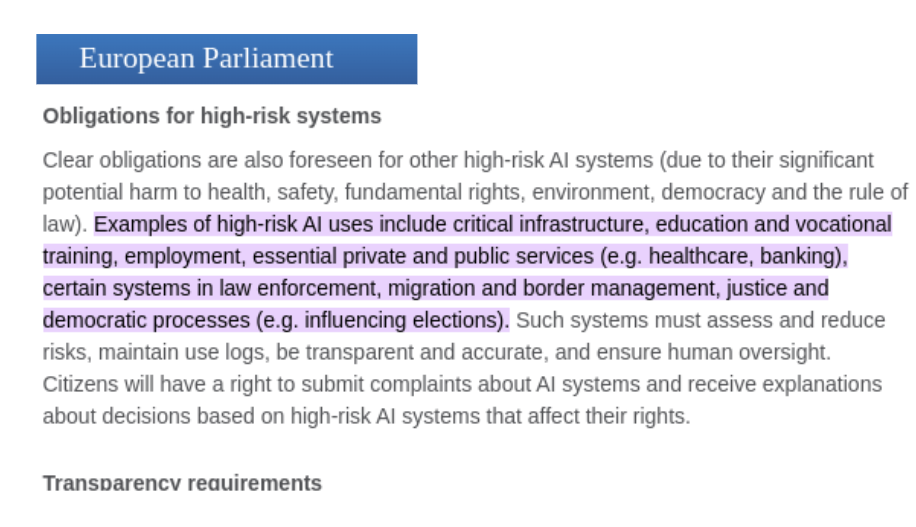


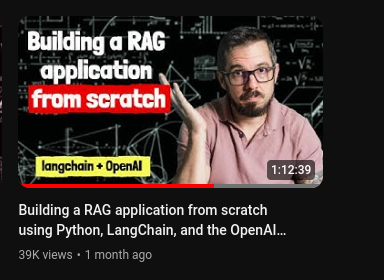



## Interview